In [ ]:
import tensorflow as tf
from keras.layers import Conv2D, BatchNormalization, Activation
from keras.layers import Add, Input, GlobalAveragePooling2D, Dense, MaxPooling2D
from keras.models import Model
from keras.utils import plot_model
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

*** Create identity Block ***



The identity block is used to add residual connections to the network without changing the dimensions of the input.
It consists of two convolutional layers with BatchNormalization and ReLU activation.

In [ ]:
def identity_block(x, filters):
    f1, f2 = filters

    x_shortcut = x

    # First component of the main path
    x = Conv2D(filters=f1, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second component of the main path
    x = Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Add shortcut value to the main path
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

*** Convolutional Block ***

The convolutional block is used to add residual connections to the network while changing the dimensions (for downsampling).
It consists of two convolutional layers with BatchNormalization and ReLU activation, and an additional convolutional layer for the shortcut connection to match dimensions.

In [ ]:
def convolutional_block(x, filters, s=2):
    f1, f2 = filters

    x_shortcut = x

    # First component of the main path
    x = Conv2D(filters=f1, kernel_size=(3, 3), strides=(s, s), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second component of the main path
    x = Conv2D(filters=f2, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)

    # Shortcut path
    x_shortcut = Conv2D(filters=f2, kernel_size=(1, 1), strides=(s, s), padding='same')(x_shortcut)
    x_shortcut = BatchNormalization()(x_shortcut)

    # Add shortcut value to the main path
    x = Add()([x, x_shortcut])
    x = Activation('relu')(x)

    return x

**Create the ResNet Architecture**

The ResNet function defines the overall architecture, starting with an initial convolution and max-pooling layer, followed by multiple stages of convolutional and identity blocks.
It ends with a global average pooling layer and a fully connected output layer with softmax activation for classification.

In [ ]:
def ResNet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Stage 1
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 2
    x = convolutional_block(x, filters=[64, 64], s=1)
    x = identity_block(x, filters=[64, 64])

    # Stage 3
    x = convolutional_block(x, filters=[128, 128], s=2)
    x = identity_block(x, filters=[128, 128])

    # Stage 4
    x = convolutional_block(x, filters=[256, 256], s=2)
    x = identity_block(x, filters=[256, 256])

    # Stage 5
    x = convolutional_block(x, filters=[512, 512], s=2)
    x = identity_block(x, filters=[512, 512])

    # Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs, outputs)
    return model

In [ ]:
model = ResNet((32,32,3), 10)

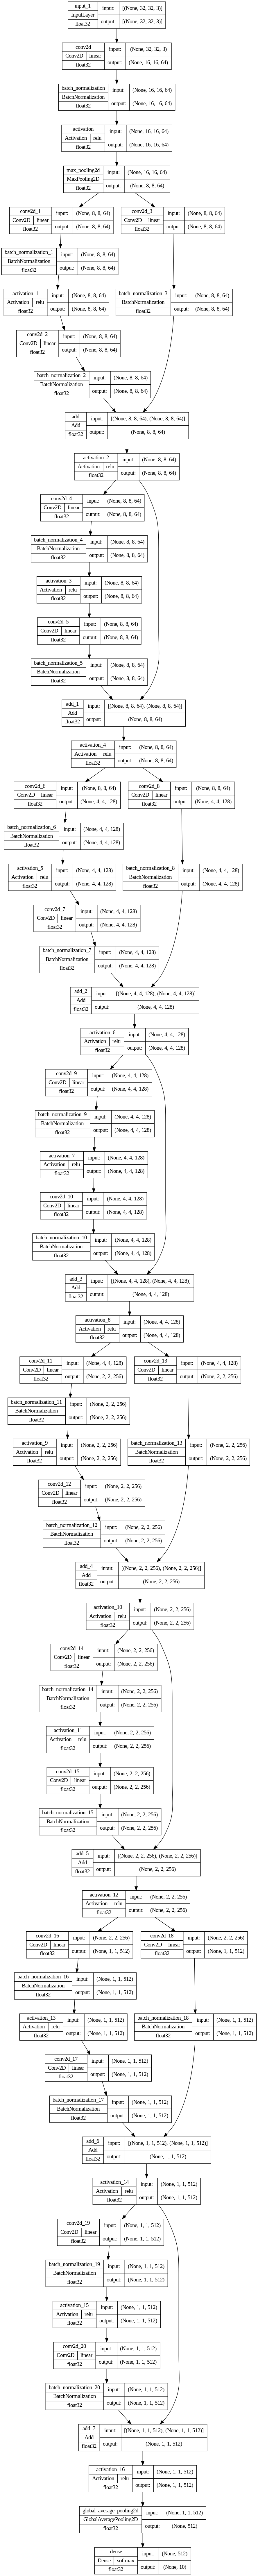

In [ ]:
plot_model(model, show_layer_activations=True, show_layer_names=True,
           show_dtype=True, show_shapes=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=10)

Epoch 1/5
5000/5000 [==============================] - 119s 20ms/step - loss: 1.6850 - accuracy: 0.4146
Epoch 2/5
5000/5000 [==============================] - 97s 19ms/step - loss: 1.2295 - accuracy: 0.5762
Epoch 3/5
5000/5000 [==============================] - 98s 20ms/step - loss: 0.9925 - accuracy: 0.6623
Epoch 4/5
5000/5000 [==============================] - 98s 20ms/step - loss: 0.8379 - accuracy: 0.7141
Epoch 5/5
5000/5000 [==============================] - 107s 21ms/step - loss: 0.7182 - accuracy: 0.7562


In [ ]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 52s 5ms/step - loss: 0.7483 - accuracy: 0.7404


[0.7483099699020386, 0.7404000163078308]